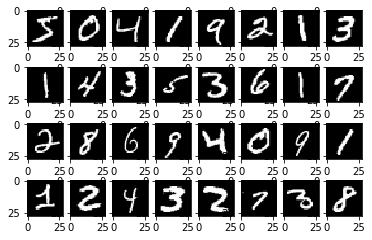

In [2]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot

# MNISTのデータを読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# データを4×8に出力
for i in range(0, 32):
    pyplot.subplot(4, 8, i + 1)
    pyplot.imshow(X_train[i], cmap='gray')
    
pyplot.show()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

# データを確認
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# ラベルデータをOne-Hotベクトルに直す
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

In [7]:
# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# モデル構造を定義
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax'))

# モデルを構築
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy'])

# 学習を実行
model.fit(X_train, y_train, batch_size=20, epochs=20)

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])


Epoch 1/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1907 - accuracy: 0.9434
Epoch 2/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0776 - accuracy: 0.9766
Epoch 3/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0536 - accuracy: 0.9830
Epoch 4/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0379 - accuracy: 0.9883
Epoch 5/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 6/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0240 - accuracy: 0.9919
Epoch 7/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0187 - accuracy: 0.9935
Epoch 8/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0169 - accuracy: 0.9945
Epoch 9/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0139 - accuracy: 0.9955
Epoch 10/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.012